In [ ]:
# @title Generate Totally Random Characteristic Functions

import itertools
import random
from typing import List, Tuple, Dict, Optional

def generate_coalitions(
    num_agents: int,
    max_capacity: Optional[int] = None
) -> List[Tuple[int, ...]]:
    """Generate all possible coalitions (subsets) of agents with sizes up to max_capacity.

    Args:
        num_agents: The total number of agents.
        max_capacity: The maximum allowed size of any coalition.

    Returns:
        A list of tuples, each representing a coalition (subset of agents).
    """
    max_capacity = max_capacity if max_capacity is not None else num_agents
    coalitions = []
    for size in range(1, max_capacity + 1):
        coalitions.extend(itertools.combinations(range(num_agents), size))
    return coalitions

def create_characteristic_function(
    num_agents: int,
) -> Dict[Tuple[int, ...], float]:
    """Create a characteristic function with random values for each coalition.

    Args:
        num_agents: The total number of agents.
        num_samples: The number of samples to use in the Monte Carlo simulation.

    Returns:
        A dictionary where each key is a coalition (tuple of agent indices),
        and each value is a randomly generated characteristic value.
    """
    # Generate all possible coalitions
    coalitions = generate_coalitions(num_agents)

    # Assign random values to each coalition
    characteristic_function = {
        coalition: random.uniform(0, 1)  for coalition in coalitions
    }

    return characteristic_function

# Example
#print(create_characteristic_function(num_agents=3, num_samples=100000))

In [ ]:
"""Test properties of a characteristic function."""

import itertools
from typing import Dict, Tuple


class PropertyTester:
  """Class for testing properties of a characteristic function.
  """

  def __init__(self, characteristic_function: Dict[Tuple[int, ...], float]):
    """Initialize the PropertyTester with a characteristic function.

    Args:
        characteristic_function: A dictionary where each key is a coalition
          (tuple of agent indices), and each value is the characteristic
          function value for that coalition.
    """
    self.characteristic_function = characteristic_function
    self.coalitions = set(characteristic_function.keys())

  def test_convexity(self, verbose: bool = False) -> bool:
    """Check convexity for the characteristic function.

    v(S∪T) + v(S∩T) ≥ v(S) + v(T)

    Args:
        verbose: If True, print detailed results for each coalition pair.

    Returns:
        bool: True if convexity holds for all coalition pairs, False otherwise.
    """
    convex = True
    for coalition1, coalition2 in itertools.combinations(self.coalitions, 2):
      union_coalition = tuple(set(coalition1).union(set(coalition2)))
      intersection_coalition = tuple(
          set(coalition1).intersection(set(coalition2))
      )

      if union_coalition not in self.coalitions:
        continue

      v_union = self.characteristic_function[union_coalition]
      # Set v_intersection to 0 if the intersection is empty or not valid
      v_intersection = self.characteristic_function.get(
          intersection_coalition, 0
      )
      v_s = self.characteristic_function[coalition1]
      v_t = self.characteristic_function[coalition2]

      if v_union + v_intersection < v_s + v_t:
        convex = False
        if verbose:
          print(f"Convexity fails for {coalition1} and {coalition2}")
          print(
              f"v(S) = {v_s}, v(T) = {v_t}, v(S∪T) = {v_union}, v(S∩T) ="
              f" {v_intersection}"
          )
    return convex

  def test_superadditivity(self, verbose: bool = False) -> bool:
    """Check superadditivity for the characteristic function.

    Superadditivity condition:
        v(S ∪ T) ≥ v(S) + v(T) for disjoint coalitions S and T

    Args:
        verbose: If True, print detailed results for each coalition pair.

    Returns:
        bool: True if superadditivity holds for all disjoint coalition pairs,
        False otherwise.
    """
    superadditive = True
    # Iterate over all unique pairs of coalitions
    for coalition1, coalition2 in itertools.combinations(self.coalitions, 2):

      # Superadditivity is only defined for disjoint coalitions
      if set(coalition1).intersection(set(coalition2)):
        continue  # Skip pairs that are not disjoint

      # Superadditivity is defined for the union of disjoint coalitions
      union_coalition = tuple(set(coalition1).union(set(coalition2)))
      # Check if the union coalition exists in the characteristic function
      if union_coalition not in self.coalitions:
        continue  # Skip if the union coalition is not defined

      # Retrieve the characteristic function values for the coalitions
      v_union = self.characteristic_function[union_coalition]
      v_s = self.characteristic_function[coalition1]
      v_t = self.characteristic_function[coalition2]

      # Check the superadditivity condition: v(S ∪ T) ≥ v(S) + v(T)
      if v_union < v_s + v_t:
        superadditive = False
        if verbose:
          print(f"Superadditivity fails for {coalition1} and {coalition2}")
          print(f"v(S) = {v_s}, v(T) = {v_t}, v(S∪T) = {v_union}")
        break  # skip the rest of the loop

    # Return True if the characteristic function is superadditive,
    # False otherwise
    return superadditive

  def test_monotonicity(self, verbose: bool = False) -> bool:
    """Check monotonicity for the characteristic function.

    v(S) ≤ v(T) for all coalitions S ⊆ T

    Args:
        verbose: If True, print detailed results for each coalition pair.

    Returns:
        bool: True if monotonicity holds for all coalition pairs, False
        otherwise.
    """
    monotonic = True
    for coalition1, coalition2 in itertools.combinations(self.coalitions, 2):
      if set(coalition1).issubset(coalition2):
        v_s = self.characteristic_function[coalition1]
        v_t = self.characteristic_function[coalition2]

        if v_s > v_t:
          monotonic = False
          if verbose:
            print(
                f"Monotonicity fails for coalition subset {coalition1} ⊆"
                f" {coalition2}"
            )
            print(f"v(S) = {v_s}, v(T) = {v_t}")
          break
    return monotonic

  def test_nonmonotonicity(self, verbose: bool = False) -> bool:
    """Check non-monotonicity for the characteristic function.

    v(S) > v(T) for some coalitions S ⊆ T

    Args:
        verbose: If True, print detailed results for each coalition pair.

    Returns:
        bool: True if non-monotonicity holds for at least one coalition pair,
        False otherwise.
    """
    non_monotonic = False
    for coalition1, coalition2 in itertools.combinations(self.coalitions, 2):
      if set(coalition1).issubset(coalition2):
        v_s = self.characteristic_function[coalition1]
        v_t = self.characteristic_function[coalition2]

        if v_s > v_t:
          non_monotonic = True
          if verbose:
            print(
                f"Non-monotonicity observed for coalition subset {coalition1} ⊆"
                f" {coalition2}"
            )
            print(f"v(S) = {v_s}, v(T) = {v_t}")
          break
    return non_monotonic

###############################################################################
# Main runner for testing
##############################################################################

# from absl import app

# def runner():
#   """Run the property tester."""

#   characteristic_function = {
#       (0,): 0.7704353599749733,
#       (1,): 0.8662270019942991,
#       (2,): 0.062244038666987134,
#       (0, 1): 0.17297121059688236,
#       (0, 2): 0.4902346230061885,
#       (1, 2): 0.27540854534584946,
#       (0, 1, 2): 0.8717929649931841,
#   }
#   tester = PropertyTester(characteristic_function)

#   # Test each property
#   convexity = tester.test_convexity()
#   superadditivity = tester.test_superadditivity()
#   monotonicity = tester.test_monotonicity()
#   nonmonotonicity = tester.test_nonmonotonicity()

#   print(f"Convexity: {convexity}")
#   print(f"Superadditivity: {superadditivity}")
#   print(f"Monotonicity: {monotonicity}")
#   print(f"Nonmonotonicity: {nonmonotonicity}")


# def main(argv: Sequence[str]) -> None:
#   del argv
#   runner()


# if __name__ == "__main__":
#   app.run(main)



In [ ]:
import random
from typing import List, Tuple, Dict, Optional
import matplotlib.pyplot as plt
from collections import defaultdict

###############################################################################
# Property Tester
###############################################################################



def test_properties(
    characteristic_function: Dict[Tuple[int, ...], float],
    max_saves: int = 5,
    property_list: List[str] = ["Convexity", "Superadditivity", "Monotonicity", "Nonmonotonicity"]
) -> Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
    """Test the characteristic function for each property and track occurrences.

    Args:
        characteristic_function: The dictionary of coalitions and values.
        max_saves: Maximum number of characteristic functions to save per property.

    Returns:
        A tuple containing:
        - A dictionary where keys are properties and values are counts of satisfying functions.
        - A dictionary where keys are properties and values are lists of characteristic
          functions that satisfy each property, up to max_saves.
    """
    # Initialize counters and storage for characteristic functions satisfying each property
    property_counts = {property: 0 for property in property_list}
    property_satisfying_functions = defaultdict(list)

    # Initialize PropertyTester with the characteristic function
    tester = PropertyTester(characteristic_function)

    # Check each property
    for property in property_list:
        if property == "Convexity" and tester.test_convexity():
            property_counts[property] += 1
            if len(property_satisfying_functions[property]) < max_saves:
                property_satisfying_functions[property].append(characteristic_function)
        elif property == "Superadditivity" and tester.test_superadditivity():
            property_counts[property] += 1
            if len(property_satisfying_functions[property]) < max_saves:
                property_satisfying_functions[property].append(characteristic_function)
        elif property == "Monotonicity" and tester.test_monotonicity():
            property_counts[property] += 1
            if len(property_satisfying_functions[property]) < max_saves:
                property_satisfying_functions[property].append(characteristic_function)
        elif property == "Nonmonotonicity" and tester.test_nonmonotonicity():
            property_counts[property] += 1
            if len(property_satisfying_functions[property]) < max_saves:
                property_satisfying_functions[property].append(characteristic_function)

    return property_counts, property_satisfying_functions

###############################################################################
# Plotter
###############################################################################
def plot_property_histogram(property_counts: Dict[str, int], total_tests: int) -> None:
    """Plot a histogram showing the percentage of occurrences of each property.

    Args:
        property_counts: A dictionary of property names and their occurrence counts.
        total_tests: The total number of characteristic functions tested.
    """
    # Calculate percentages for each property
    property_percentages = {prop: (count / total_tests) * 100 for prop, count in property_counts.items()}

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(property_percentages.keys(), property_percentages.values())
    plt.xlabel("Properties")
    plt.ylabel("Percentage of Occurrences")
    plt.title("Percentage of Occurrences of Each Property in Characteristic Functions")
    plt.show()



###############################################################################
# RUNNER
################################################################################

#num_agents = 2
#num_samples = 10,000,000
#max_saves = 5 # how many of each class we want to save
#characteristic_function = create_characteristic_function(num_agents)

# Run property tests and retrieve counts and satisfying functions

#property_counts, property_satisfying_functions = test_properties(characteristic_function, max_saves=20)

#print(property_counts)
#print(property_satisfying_functions)

# Histogram
#total_tests = 10 # to calculate the percentage
#plot_property_histogram(property_counts, total_tests)


In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

def monte_carlo_simulation(
    num_agents: int,
    num_samples: int,
    max_saves: int = 5,
    property_list: List[str] = ["Convexity", "Superadditivity", "Monotonicity", "Nonmonotonicity"]
) -> Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
    """
    Run Monte Carlo simulations of characteristic functions and test each for
    properties.

    Args:
        num_agents: Number of agents in each simulation.
        num_samples: Number of simulations to run.
        max_saves: Max number of characteristic functions to save per property.

    Returns:
        property_counts: Count of functions satisfying each property.
        property_satisfying_functions: Functions satisfying each property.
    """
    # Initialize aggregate results
    aggregate_counts = {prop: 0 for prop in property_list}
    aggregate_functions = defaultdict(list)

    for _ in range(num_samples):
        # Generate a new random characteristic function
        characteristic_function = create_characteristic_function(num_agents)

        # Test and record results for this sample
        sample_counts, sample_functions = test_properties(characteristic_function, max_saves)

        # Aggregate results
        for prop, count in sample_counts.items():
            aggregate_counts[prop] += count
            if len(aggregate_functions[prop]) < max_saves:
                aggregate_functions[prop].extend(sample_functions[prop])

    return aggregate_counts, aggregate_functions

# Plot the histogram
def plot_property_histogram(property_counts: Dict[str, int], total_tests: int) -> None:
    property_percentages = {prop: (count / total_tests) * 100 for prop, count in property_counts.items()}
    plt.figure(figsize=(10, 6))
    plt.bar(property_percentages.keys(), property_percentages.values())
    plt.xlabel("Properties")
    plt.ylabel("Percentage of Occurrences")
    plt.title("Percentage of Occurrences of Each Property in Characteristic Functions")
    plt.show()

# Parameters
num_agents = 3
num_samples = 100000
max_saves = 5           # Maximum characteristic functions to save per property

# Run simulation and plot results
property_counts, property_satisfying_functions = monte_carlo_simulation(num_agents, num_samples, max_saves)
plot_property_histogram(property_counts, num_samples)

In [ ]:
# @title Factory for Superadditive and Convex

from typing import Dict, Tuple, List
from collections import defaultdict
import random
import itertools
import matplotlib.pyplot as plt


class CharacteristicFunctionFactory:
    """A factory for generating characteristic functions for cooperative games.

    Generates characteristic functions with superadditive properties and
    optionally convexity. By introducing small randomized constants δ and ϵ, it ensures
    variability while controlling the degree of superadditivity and convexity.
    """

    def __init__(self, num_players: int, convex: bool = True) -> None:
        """Initialize the factory.

        Args:
            num_players: Number of players in the game.
            convex: Whether the characteristic function should enforce convexity.
        """
        self.num_players = num_players
        self.convex = convex
        self.delta = 0.05  # Small value for superadditivity
        self.epsilon = 0.05  # Small value for non-convexity

    def generate(self) -> Dict[Tuple[int, ...], float]:
        """Generate a characteristic function for a cooperative game.

        Returns:
            Dict[Tuple[int, ...], float]: A dictionary representing the characteristic function
            with coalition tuples as keys and their corresponding values as floats.
        """

        # Generate all possible coalitions
        characteristic_function: Dict[Tuple[int, ...], float] = {}
        all_coalitions = [
            tuple(sorted(subset)) for i in range(self.num_players + 1)
            for subset in itertools.combinations(range(self.num_players), i)
        ]

        # Step 1: Baseline value: Assign random values to singletons
        for player in range(self.num_players):
            characteristic_function[(player,)] = random.uniform(0, 1)

        # Iterate over all possible coalitions and assing values to their union
        # or intersection according to the rule (superadditive/convex).

        # Step 2: Ensure superadditivity for disjoint coalitions
        # Union has to be greater than smalled coalitions
        # Iterate over all possible ways of forming a coalition and
        # update the coalition value
        for S in all_coalitions:
            for T in all_coalitions:
                if set(S).isdisjoint(T) and S and T:
                    characteristic_function[tuple(sorted(S + T))] = max(
                        characteristic_function.get(tuple(sorted(S + T)), 0),
                        characteristic_function.get(S, 0) + characteristic_function.get(T, 0) + self.delta
                    )

        # Step 3: Handle overlapping coalitions for convexity or non-convexity
        for S in all_coalitions:
            for T in all_coalitions:
                if S and T and not set(S).isdisjoint(T):
                    union_ST = tuple(sorted(set(S).union(T)))
                    intersection_ST = tuple(sorted(set(S).intersection(T)))

                    if self.convex:
                        characteristic_function[union_ST] = max(
                            characteristic_function.get(union_ST, 0),
                            characteristic_function.get(S, 0) +
                            characteristic_function.get(T, 0) -
                            characteristic_function.get(intersection_ST, 0) + self.delta
                        )
                    else:
                        characteristic_function[union_ST] = max(
                            characteristic_function.get(union_ST, 0),
                            characteristic_function.get(S, 0) +
                            characteristic_function.get(T, 0) -
                            characteristic_function.get(intersection_ST, 0) - self.epsilon
                        )

        return characteristic_function


class MonteCarloSimulation:
    """Performs Monte Carlo simulations to evaluate properties of characteristic functions."""

    def __init__(self, num_players: int, num_samples: int, convex: bool = True, max_saves: int = 5) -> None:
        """Initialize the simulation.

        Args:
            num_players: Number of players in the game.
            num_samples: Number of characteristic functions to generate and evaluate.
            convex: Whether the characteristic functions should enforce convexity.
            max_saves: Maximum number of characteristic functions to save per property.
        """
        self.num_players = num_players
        self.num_samples = num_samples
        self.convex = convex
        self.max_saves = max_saves
        self.property_list = ["Convexity", "Superadditivity", "Monotonicity", "Nonmonotonicity"]

    def run(self) -> Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
        """Run the Monte Carlo simulation.

        Returns:
            Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
                - A dictionary with counts of functions satisfying each property.
                - A dictionary containing saved characteristic functions for each property.
        """
        aggregate_counts: Dict[str, int] = {prop: 0 for prop in self.property_list}
        aggregate_functions: Dict[str, List[Dict[Tuple[int, ...], float]]] = defaultdict(list)

        factory = CharacteristicFunctionFactory(self.num_players, self.convex)

        for _ in range(self.num_samples):

            # Generate characteristic functions
            characteristic_function = factory.generate()
            sample_counts, sample_functions = self.test_properties(characteristic_function)

            # Save characteristic functions
            for prop, count in sample_counts.items():
                aggregate_counts[prop] += count
                if len(aggregate_functions[prop]) < self.max_saves:
                    aggregate_functions[prop].extend(sample_functions[prop])

        return aggregate_counts, aggregate_functions

    def test_properties(self, characteristic_function: Dict[Tuple[int, ...], float]) -> Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
        """Test properties of a characteristic function.

        Args:
            characteristic_function: The characteristic function to test.

        Returns:
            Tuple[Dict[str, int], Dict[str, List[Dict[Tuple[int, ...], float]]]]:
                - A dictionary with counts of properties satisfied by the function.
                - A dictionary of functions satisfying each property (limited by max_saves).
        """
        property_counts: Dict[str, int] = {property: 0 for property in self.property_list}
        property_satisfying_functions: Dict[str, List[Dict[Tuple[int, ...], float]]] = defaultdict(list)

        # Assuming PropertyTester is defined elsewhere
        tester = PropertyTester(characteristic_function)

        for property in self.property_list:
            if property == "Convexity" and tester.test_convexity():
                property_counts[property] += 1
                if len(property_satisfying_functions[property]) < self.max_saves:
                    property_satisfying_functions[property].append(characteristic_function)
            elif property == "Superadditivity" and tester.test_superadditivity():
                property_counts[property] += 1
                if len(property_satisfying_functions[property]) < self.max_saves:
                    property_satisfying_functions[property].append(characteristic_function)
            elif property == "Monotonicity" and tester.test_monotonicity():
                property_counts[property] += 1
                if len(property_satisfying_functions[property]) < self.max_saves:
                    property_satisfying_functions[property].append(characteristic_function)
            elif property == "Nonmonotonicity" and tester.test_nonmonotonicity():
                property_counts[property] += 1
                if len(property_satisfying_functions[property]) < self.max_saves:
                    property_satisfying_functions[property].append(characteristic_function)

        return property_counts, property_satisfying_functions


class Plotter:
    """Utility class for plotting results."""

    @staticmethod
    def plot_property_histogram(property_counts: Dict[str, int], total_tests: int) -> None:
        """Plots a histogram of property occurrences.

        Args:
            property_counts: The counts of each property.
            total_tests: The total number of tests conducted.
        """
        property_percentages = {prop: (count / total_tests) * 100 for prop, count in property_counts.items()}
        plt.figure(figsize=(10, 6))
        plt.bar(property_percentages.keys(), property_percentages.values())
        plt.xlabel("Properties")
        plt.ylabel("Percentage of Occurrences")
        plt.title("Percentage of Occurrences of Each Property in Characteristic Functions")
        plt.show()


def main() -> None:
    """Run the Monte Carlo simulation, plot results, and print saved functions."""
    num_players = 3          # Adjust based on the number of players
    num_samples = 100        # Number of Monte Carlo simulations
    convex =  False #True    # Set to False for non-convex instances
    max_saves = 5            # Maximum characteristic functions to save per property

    # Run simulation
    simulation = MonteCarloSimulation(num_players, num_samples, convex, max_saves)
    property_counts, property_satisfying_functions = simulation.run()

    # Plot results
    Plotter.plot_property_histogram(property_counts, num_samples)

    # Print saved functions
    print("Characteristic functions satisfying properties:")
    for property, functions in property_satisfying_functions.items():
        print(f"{property}: {len(functions)} saved functions")


if __name__ == "__main__":
    main()


<ipython-input-2-bfb7092ea87a>:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  region = Polygon(vertices, closed=True, alpha=0.3, color='lightblue', edgecolor='blue')


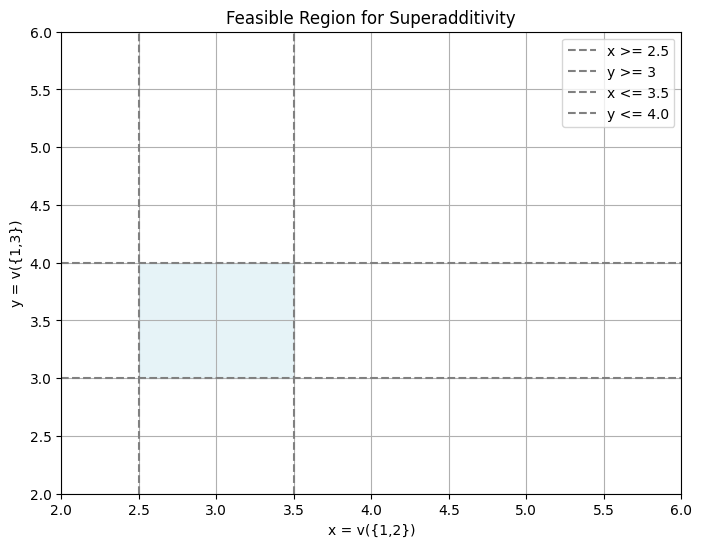

In [2]:
# @title Plot of the inequalities

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Fixed values for singletons and the grand coalition
v1 = 1
v2 = 1.5
v3 = 2
v123 = 5.5

# Inequalities
x_min = v1 + v2  # x >= v1 + v2
y_min = v1 + v3  # y >= v1 + v3
x_max = v123 - v3  # x <= v123 - v3
y_max = v123 - v2  # y <= v123 - v2

# Plot the feasible region
fig, ax = plt.subplots(figsize=(8, 6))

# Vertices of the feasible region
vertices = [(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)]
region = Polygon(vertices, closed=True, alpha=0.3, color='lightblue', edgecolor='blue')

# Add the region to the plot
ax.add_patch(region)

# Axes and labels
plt.axvline(x_min, color='gray', linestyle='--', label=f'x >= {x_min}')
plt.axhline(y_min, color='gray', linestyle='--', label=f'y >= {y_min}')
plt.axvline(x_max, color='gray', linestyle='--', label=f'x <= {x_max}')
plt.axhline(y_max, color='gray', linestyle='--', label=f'y <= {y_max}')

plt.xlim(2, 6)
plt.ylim(2, 6)
plt.xlabel('x = v({1,2})')
plt.ylabel('y = v({1,3})')
plt.title('Feasible Region for Superadditivity')
plt.legend()
plt.grid()
plt.show()


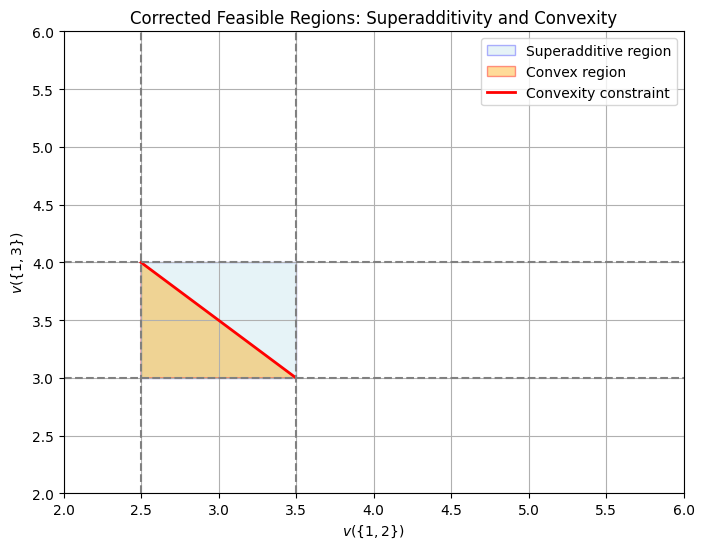

In [3]:
# @title Plot of the inequalities (with convexity)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Fixed values for singletons and the grand coalition
v1 = 1
v2 = 1.5
v3 = 2
v123 = 5.5

# Superadditive inequalities
x_min = v1 + v2
y_min = v1 + v3
x_max = v123 - v3
y_max = v123 - v2

# Set up figure
fig, ax = plt.subplots(figsize=(8, 6))

# Vertices for the superadditive region
vertices_superadd = np.array([
    [x_min, y_min],
    [x_max, y_min],
    [x_max, y_max],
    [x_min, y_max]
])

# Convexity constraint: v({1,3}) <= v123 + v1 - v({1,2})
x_vals = np.linspace(x_min, x_max, 200)
y_convex = v123 + v1 - x_vals

# Compute correct convex region vertices (intersection)
vertices_convex = [
    (x_min, y_min),
    (x_max, y_min),
    (x_max, min(y_max, v123 + v1 - x_max)),
    (v123 + v1 - y_max, y_max),
    (x_min, min(y_max, v123 + v1 - x_min))
]

# Plot superadditive region
region_superadd = Polygon(vertices_superadd, closed=True, alpha=0.3,
                          facecolor='lightblue', edgecolor='blue',
                          label="Superadditive region")
ax.add_patch(region_superadd)

# Plot convex region
region_convex = Polygon(vertices_convex, closed=True, alpha=0.4,
                        facecolor='orange', edgecolor='red',
                        label="Convex region")
ax.add_patch(region_convex)

# Plot convexity constraint line
ax.plot(x_vals, y_convex, 'r-', linewidth=2, label='Convexity constraint')

# Axes lines
ax.axvline(x_min, color='gray', linestyle='--')
ax.axhline(y_min, color='gray', linestyle='--')
ax.axvline(x_max, color='gray', linestyle='--')
ax.axhline(y_max, color='gray', linestyle='--')

# Axes labels and plot title
ax.set_xlim(2, 6)
ax.set_ylim(2, 6)
ax.set_xlabel('$v(\\{1,2\\})$')
ax.set_ylabel('$v(\\{1,3\\})$')
ax.set_title('Corrected Feasible Regions: Superadditivity and Convexity')
ax.legend()
ax.grid()

plt.show()


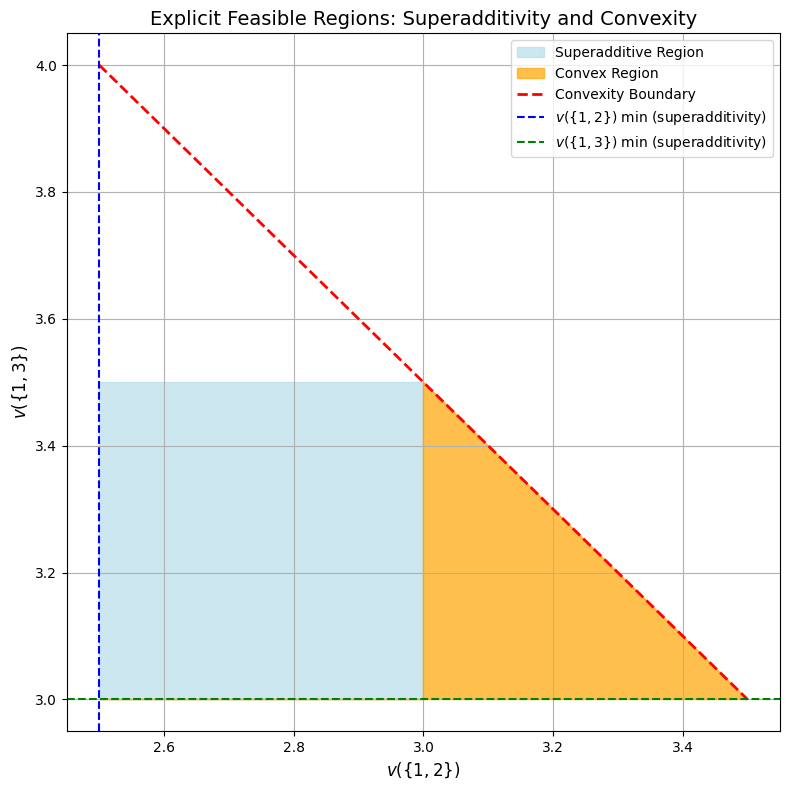

In [1]:
# @title Plot of the inequalities (with convexity) - Finally used in the Thesis



# Clear and explicit illustration with properly chosen coalition values
# -> Meaning that I didn't choose a priori the value of the GCoalition (like the graphs above)
# but it was entirely derived from the inequalities.

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fix singletons explicitly
v1, v2, v3 = 1, 1.5, 2

# Step 2: Choose pairwise coalitions slightly above minimum
v12_min, v13_min = v1 + v2, v1 + v3
v12, v13 = 3, 3.5  # explicitly chosen above minimum

# Step 3: Compute grand coalition bounds explicitly
superadd_lower_bound = max(v12 + v3, v13 + v2, v2 + v3 + v1)
convexity_lower_bound = v12 + v13 - v1

# Grand coalition explicitly chosen respecting all bounds
v123 = max(superadd_lower_bound, convexity_lower_bound)

# Plot regions clearly
plt.figure(figsize=(8, 8))

# Superadditive region vertices (explicit)
superadd_vertices = np.array([
    [v12_min, v13_min],
    [v12, v13_min],
    [v12, v13],
    [v12_min, v13]
])

# Convex region vertices explicitly from convexity constraint
convex_boundary_y = lambda x: v123 + v1 - x
convex_vertices = np.array([
    [v12_min, v13_min],
    [v12, v13_min],
    [v12, convex_boundary_y(v12)],
    [convex_boundary_y(v13_min), v13_min]
])

# Fill regions explicitly
plt.fill(*zip(*superadd_vertices), color='lightblue', alpha=0.6, label='Superadditive Region')
plt.fill(*zip(*convex_vertices), color='orange', alpha=0.7, label='Convex Region')

# Plot convexity boundary explicitly
v12_vals = np.linspace(v12_min, v12 + 0.5, 100)
plt.plot(v12_vals, convex_boundary_y(v12_vals), 'r--', linewidth=2, label='Convexity Boundary')

# Axes labels and lines
plt.axvline(v12_min, color='blue', linestyle='--', label='$v(\\{1,2\\})$ min (superadditivity)')
plt.axhline(v13_min, color='green', linestyle='--', label='$v(\\{1,3\\})$ min (superadditivity)')

plt.xlabel('$v(\\{1,2\\})$', fontsize=12)
plt.ylabel('$v(\\{1,3\\})$', fontsize=12)
plt.title('Explicit Feasible Regions: Superadditivity and Convexity', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
